In [1]:
import pandas as pd
from astropy.table import Table, vstack
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
import seaborn as sns; sns.set()
sns.set_theme(style="ticks")

In [2]:
df = pd.read_csv("../STARS/MC-STAR-16r18-StN3.csv")

In [3]:
df

,Field,ID,RA_r,DEC_r,X_r,Y_r,s2n_r_psf,s2n_J0660_psf,s2n_i_psf,CLASS_STAR_r,CLASS_STAR_i,r_psf,J0660_psf,i_psf,e_r_psf,e_J0660_psf,e_i_psf
0,b'MC0118',b'iDR4_3_MC0118_0004285',27.949976,-74.07411,6346.61,1488.32,67.687500,49.227272,60.166668,1,1,16.196392,15.938392,16.326290,0.016,0.022,0.018
1,b'MC0118',b'iDR4_3_MC0118_0004490',30.769316,-74.05729,1279.28,1518.59,51.571430,45.125000,36.100000,1,1,16.159430,16.165430,16.062025,0.021,0.024,0.030
2,b'MC0118',b'iDR4_3_MC0118_0005215',27.994871,-74.05575,6266.83,1609.12,41.653847,57.000000,27.075000,1,1,16.067392,16.042390,15.927290,0.026,0.019,0.040
3,b'MC0118',b'iDR4_3_MC0118_0005398',27.357098,-74.04949,7414.29,1635.75,47.086956,60.166668,60.166668,1,1,16.156225,16.048225,15.723079,0.023,0.018,0.018
4,b'MC0118',b'iDR4_3_MC0118_0005981',28.837078,-74.03711,4751.58,1731.26,77.357140,63.705883,32.818180,1,1,16.126030,16.100030,15.971693,0.014,0.017,0.033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455439,b'MC0118',b'iDR4_3_MC0118_0003207',27.443493,-74.09320,7254.22,1352.29,51.571430,43.320000,31.852942,1,1,17.972496,17.908497,17.662070,0.021,0.025,0.034
1455440,b'MC0118',b'iDR4_3_MC0118_0003723',29.569403,-74.08045,3438.81,1430.29,43.320000,40.111110,23.042553,1,1,17.916563,17.867561,17.710478,0.025,0.027,0.047
1455441,b'MC0118',b'iDR4_3_MC0118_0003570',28.258670,-74.08750,5791.92,1403.60,47.086956,41.653847,25.186047,1,1,17.852638,17.826190,17.642162,0.023,0.026,0.043
1455442,b'MC0118',b'iDR4_3_MC0118_0003738',26.757875,-74.07767,8486.82,1426.70,43.320000,40.111110,29.270270,1,1,17.918911,18.109911,18.199066,0.025,0.027,0.037


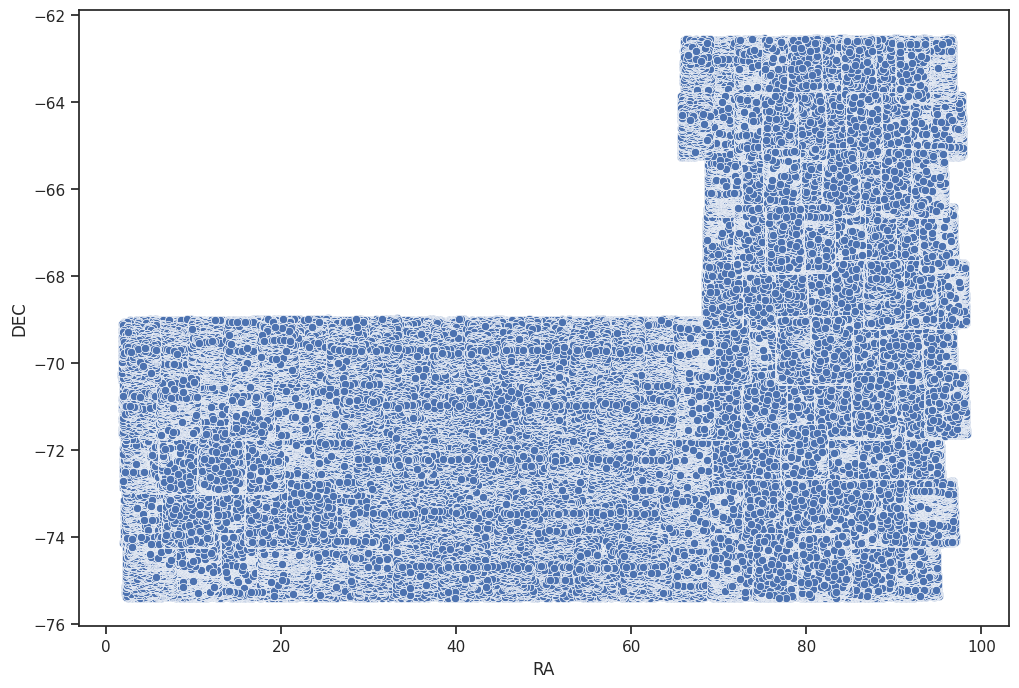

In [4]:
# Create a scatter plot with color mapping
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df["RA_r"], y=df["DEC_r"])  # y_labels are the labels for each data point
#plt.title("UMAP Visualization")
plt.xlabel("RA")
plt.ylabel("DEC")
#plt.legend()
plt.show()


## Halpha emitters

In [5]:
# Open an ASCII table (e.g., a CSV file)
table = Table.read("../STARS/Halpha-MC-STAR-18r19-StN3.ecsv", format="ascii.ecsv")
pn_smc = pd.read_csv("../smc-final-withsplus-mag-updated.csv")
pn_lmc = pd.read_csv("../TAP_3_J_A+A_456_451_PNe.csv")
pn_smc

,Field,ID,RA_r,DEC_r,X_r,Y_r,s2n_r_psf,s2n_J0660_psf,s2n_i_psf,CLASS_STAR_r,...,e_J0410_psf,e_J0430_psf,e_g_psf,e_J0515_psf,e_r_psf,e_J0660_psf,e_i_psf,e_J0861_psf,e_z_psf,Name
0,b'MC0093',b'iDR4_3_MC0093_0155050',7.338498,-72.235330,8596.47,5357.46,31.852942,57.000000,17.190475,1,...,0.036,0.041,0.019,0.047,0.034,0.019,0.063,0.115,0.107,MGPN_SMC_3
1,b'MC0093',b'iDR4_3_MC0093_0237121',8.161891,-71.699936,6994.68,8892.81,47.086956,40.111110,27.075000,1,...,0.026,0.019,0.014,0.035,0.023,0.027,0.040,0.051,0.046,LHA_115-N_2
2,b'MC0093',b'iDR4_3_MC0093_0391833',10.340383,-72.754684,2683.99,1963.73,63.705883,51.571430,34.935482,1,...,0.029,0.026,0.014,0.031,0.017,0.021,0.031,0.053,0.041,LHA_115-N_5
3,b'MC0048',b'iDR4_3_MC0048_0001615',14.022394,-70.323906,9471.20,1394.05,57.000000,108.300000,29.270270,1,...,0.048,0.036,0.024,0.023,0.019,0.010,0.037,0.061,99.000,LHA_115-N_54
4,b'MC0117',b'iDR4_3_MC0117_0000452',21.049377,-74.042280,10240.92,1595.20,77.357140,108.300000,30.942858,1,...,0.070,0.052,0.026,0.031,0.014,0.010,0.035,0.067,0.053,LIN_536
5,b'MC0117',b'iDR4_3_MC0117_0009311',25.792791,-72.950714,1454.47,8773.85,25.186047,36.100000,12.168539,1,...,99.000,0.101,0.039,0.080,0.043,0.030,0.089,99.000,99.000,MGPN_SMC_13
6,b'MC0094',b'iDR4_3_MC0094_0050815',13.296437,-72.752070,5572.11,2014.93,51.571430,98.454544,28.500000,1,...,0.046,0.036,0.013,0.032,0.021,0.011,0.038,0.044,0.048,LIN_239
7,b'MC0094',b'iDR4_3_MC0094_0137028',14.218616,-72.350620,3743.68,4629.80,27.075000,23.543478,18.355932,0,...,0.080,0.091,0.052,0.077,0.040,0.046,0.059,0.093,0.096,[JD2002]_17
8,b'MC0094',b'iDR4_3_MC0094_0174449',14.081082,-72.116180,3997.53,6167.91,67.687500,49.227272,43.320000,1,...,0.023,0.023,0.013,0.023,0.016,0.022,0.025,0.042,0.037,LIN_302
9,b'MC0094',b'iDR4_3_MC0094_0183910',14.817113,-72.033320,2504.92,6682.69,90.250000,90.250000,51.571430,1,...,0.021,0.013,0.010,0.021,0.012,0.012,0.021,0.027,0.031,LHA_115-N_70


In [6]:
table

Field,ID,RA_r,DEC_r,X_r,Y_r,s2n_r_psf,s2n_J0660_psf,s2n_i_psf,CLASS_STAR_r,CLASS_STAR_i,r_psf,J0660_psf,i_psf,e_r_psf,e_J0660_psf,e_i_psf,r - i,r - J0660,e(r - i),e(r - J0660)
str9,str24,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
b'MC0063',b'iDR4_3_MC0063_0044192',73.701324,-69.80758,8806.82,4792.96,43.32,45.125,25.186047,1,1,18.089611,17.88461,18.296148,0.025,0.024,0.043,-0.2065369999999973,0.20500100000000288,0.049739320461783545,0.034655446902326914
b'MC0063',b'iDR4_3_MC0063_0050356',73.91816,-69.71265,8329.69,5425.12,40.11111,47.086956,21.235294,1,1,18.060902,17.927902,18.379478,0.027,0.023,0.051,-0.3185760000000002,0.13299999999999912,0.05770615218501403,0.0354682957019364
b'MC0063',b'iDR4_3_MC0063_0001062',73.24875,-70.38729,9710.03,971.62,33.84375,28.5,15.471429,1,1,18.057009,18.206009,19.024343,0.032,0.038,0.07,-0.9673339999999975,-0.1490000000000009,0.07696752561957543,0.04967896939349688
b'MC0063',b'iDR4_3_MC0063_0004007',73.04034,-70.34989,10176.28,1201.08,30.083334,25.186047,16.921875,1,1,18.051008,18.191008,19.060518,0.036,0.043,0.064,-1.0095099999999988,-0.14000000000000057,0.07343023900274327,0.056080299571239806
b'MC0063',b'iDR4_3_MC0063_0083651',73.404366,-69.36323,9561.38,7682.73,32.81818,38.67857,20.055555,1,1,18.049875,17.835876,18.20753,0.033,0.028,0.054,-0.15765499999999832,0.21399900000000116,0.06328506932918695,0.0432781700167648
b'MC0063',b'iDR4_3_MC0063_0031223',73.42313,-70.01271,9396.91,3434.24,38.67857,49.227272,19.339285,1,1,18.030386,17.876387,18.316498,0.028,0.022,0.056,-0.28611199999999926,0.1539989999999989,0.06260990336999411,0.035608987629529715
b'MC0063',b'iDR4_3_MC0063_0033758',73.46117,-69.977264,9318.3,3668.58,31.852942,36.1,14.25,1,1,18.095387,17.795385,18.436497,0.034,0.03,0.076,-0.34111000000000047,0.3000019999999992,0.0832586331859946,0.045343136195018535
b'MC0063',b'iDR4_3_MC0063_0041209',75.321594,-69.86269,5147.26,4471.39,31.852942,38.67857,20.433962,1,1,18.058475,17.890476,18.312267,0.034,0.028,0.053,-0.25379199999999713,0.16799900000000179,0.06296824596572466,0.044045431091090485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


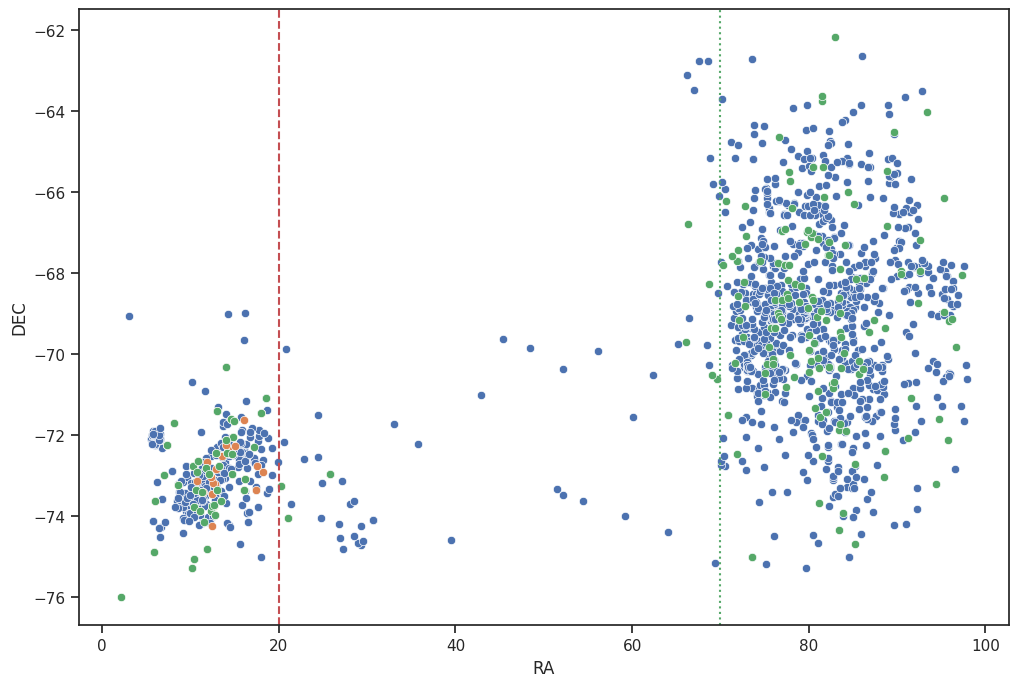

In [7]:
# Create a scatter plot with color mapping
plt.figure(figsize=(12, 8))
sns.scatterplot(x=table["RA_r"], y=table["DEC_r"])  # y_labels are the labels for each data point
sns.scatterplot(x=pn_smc["RA_r"], y=pn_smc["DEC_r"])
sns.scatterplot(x=pn_lmc["_RA"], y=pn_lmc["_DE"])
plt.axvline(x=20, color='r', linestyle='--', label='Vertical Line at x=2')
plt.axvline(x=70, color='g', linestyle=':', label='Vertical Line at x=4')
#plt.title("UMAP Visualization")
plt.xlabel("RA")
plt.ylabel("DEC")
#plt.legend()
plt.show()

In [8]:
ra_mc = table["RA_r"]
dec_mc = table["DEC_r"]
icrs_mc = SkyCoord(ra=ra_mc*u.degree, dec=dec_mc*u.degree, frame='icrs')
gal_mc = icrs_mc.galactic
l_rad_mc = gal_mc.l.radian
l_rad_mc[l_rad_mc > np.pi] -= 2. * np.pi
b_rad_mc = gal_mc.b.radian
b_deg_mc = b_rad_mc * (180/np.pi)#gal.b.degree#b_rad * (180/np.pi)
l_deg_mc = l_rad_mc * (180/np.pi)


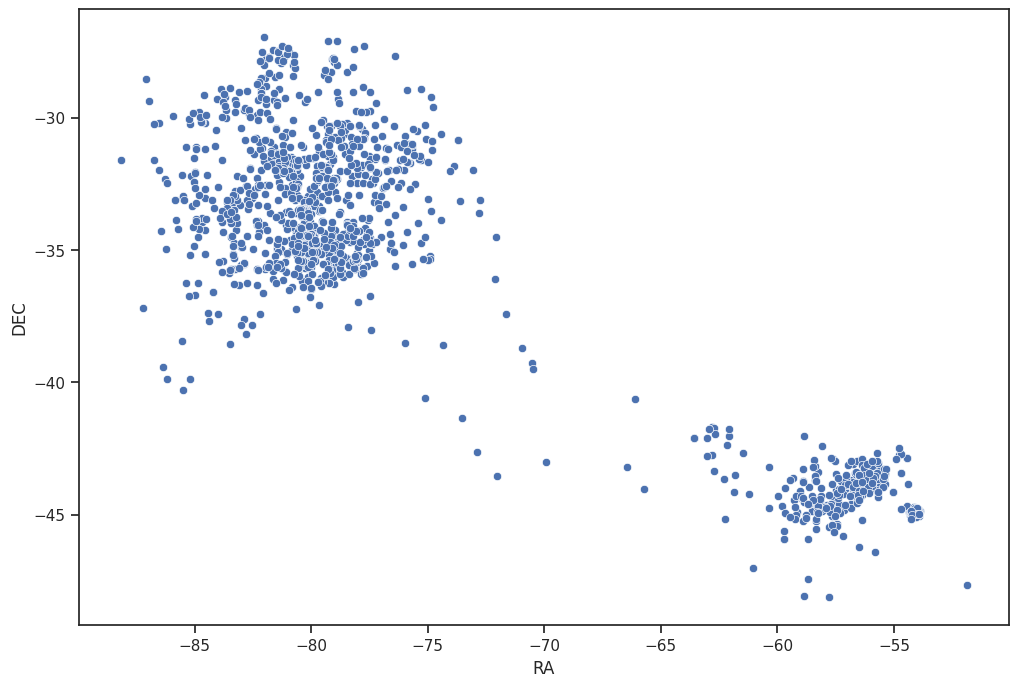

In [9]:
# Create a scatter plot with color mapping
plt.figure(figsize=(12, 8))
sns.scatterplot(x=l_deg_mc, y=b_deg_mc)  # y_labels are the labels for each data point
#plt.title("UMAP Visualization")
plt.xlabel("RA")
plt.ylabel("DEC")
#plt.legend()
plt.show()

In [10]:
table1 = Table.read("../STARS/Halpha-MC-STAR-19r20-StN3.ecsv", format="ascii.ecsv")

In [11]:
ra_mc1 = table1["RA_r"]
dec_mc1 = table1["DEC_r"]
icrs_mc1 = SkyCoord(ra=ra_mc1*u.degree, dec=dec_mc1*u.degree, frame='icrs')
gal_mc1 = icrs_mc1.galactic
l_rad_mc1 = gal_mc1.l.radian
l_rad_mc1[l_rad_mc1 > np.pi] -= 2. * np.pi
b_rad_mc1 = gal_mc1.b.radian
b_deg_mc1 = b_rad_mc1 * (180/np.pi)#gal.b.degree#b_rad * (180/np.pi)
l_deg_mc1 = l_rad_mc1 * (180/np.pi)


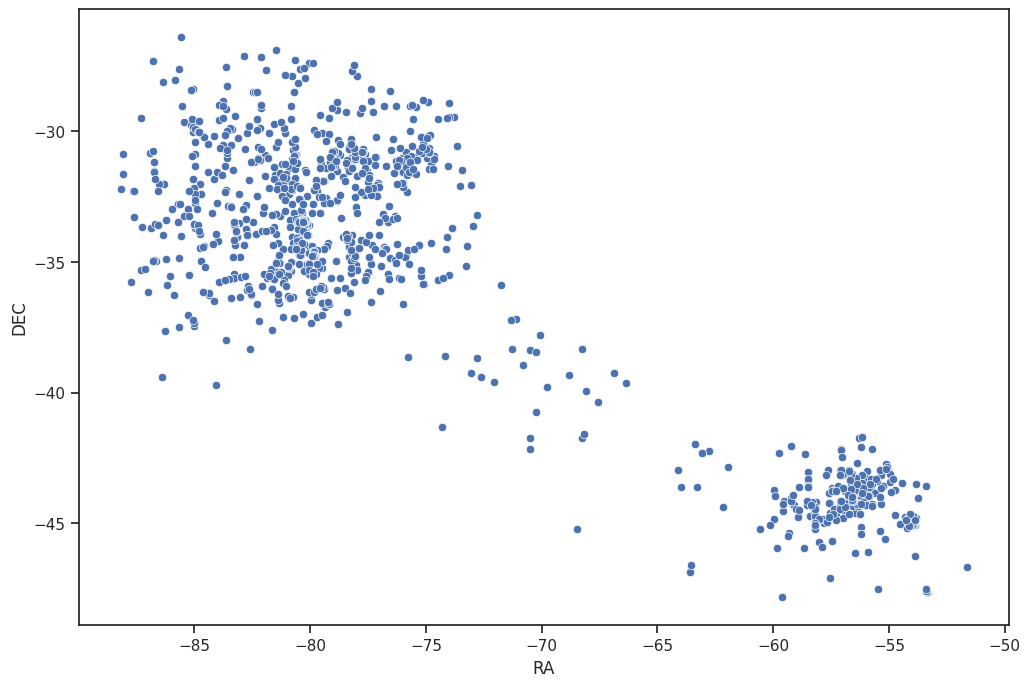

In [12]:
# Create a scatter plot with color mapping
plt.figure(figsize=(12, 8))
sns.scatterplot(x=l_deg_mc1, y=b_deg_mc1)  # y_labels are the labels for each data point
#plt.title("UMAP Visualization")
plt.xlabel("RA")
plt.ylabel("DEC")
#plt.legend()
plt.show()

In [13]:
table2 = Table.read("../STARS/Halpha-MC-STAR-16r18-StN3.ecsv", format="ascii.ecsv")

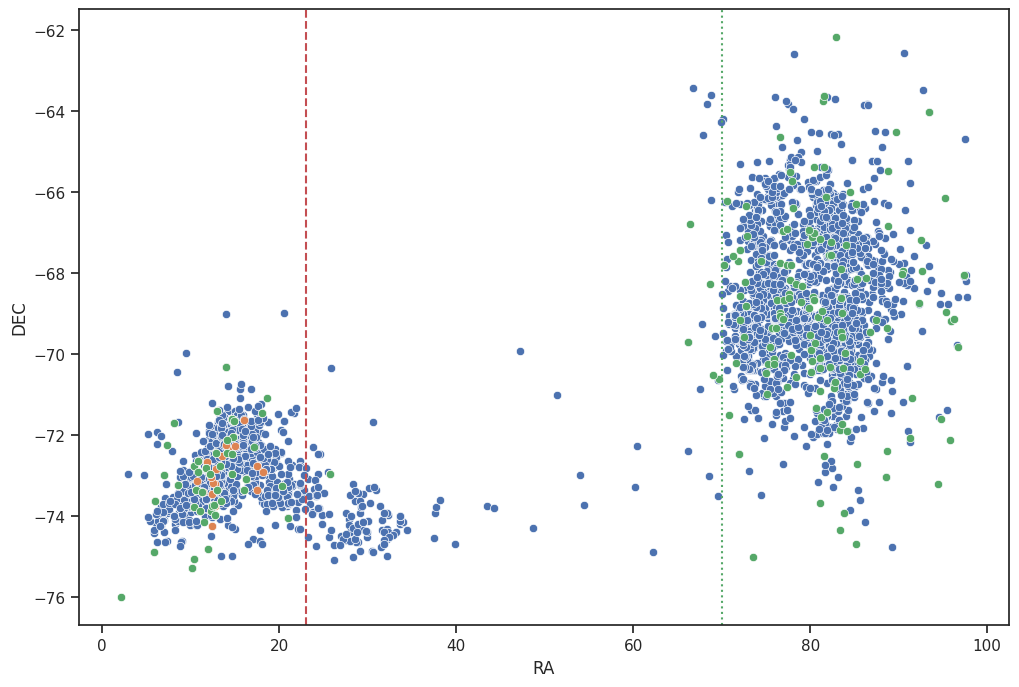

In [14]:
# Create a scatter plot with color mapping
plt.figure(figsize=(12, 8))
sns.scatterplot(x=table2["RA_r"], y=table2["DEC_r"])  # y_labels are the labels for each data point
sns.scatterplot(x=pn_smc["RA_r"], y=pn_smc["DEC_r"])
sns.scatterplot(x=pn_lmc["_RA"], y=pn_lmc["_DE"])
plt.axvline(x=23, color='r', linestyle='--', label='Vertical Line at x=2')
plt.axvline(x=70, color='g', linestyle=':', label='Vertical Line at x=4')
#plt.title("UMAP Visualization")
plt.xlabel("RA")
plt.ylabel("DEC")
#plt.legend()
plt.show()

In [15]:
table3 = Table.read("../STARS/Halpha-MC-STAR-12r16-StN3.ecsv", format="ascii.ecsv")

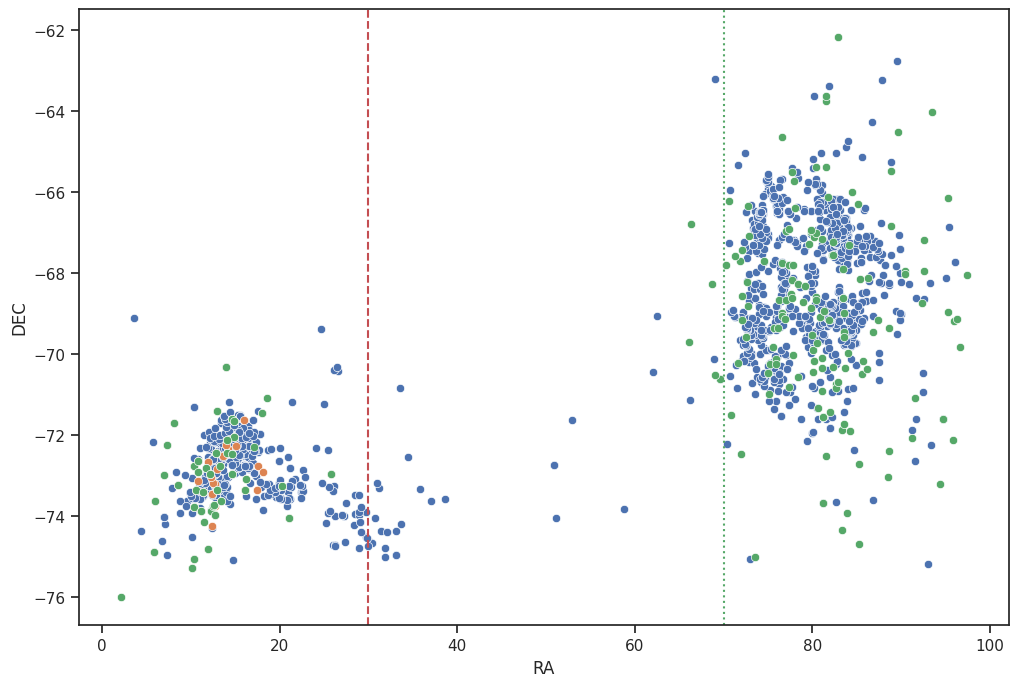

In [16]:
# Create a scatter plot with color mapping
plt.figure(figsize=(12, 8))
sns.scatterplot(x=table3["RA_r"], y=table3["DEC_r"])  # y_labels are the labels for each data point
sns.scatterplot(x=pn_smc["RA_r"], y=pn_smc["DEC_r"])
sns.scatterplot(x=pn_lmc["_RA"], y=pn_lmc["_DE"])
plt.axvline(x=30, color='r', linestyle='--', label='Vertical Line at x=2')
plt.axvline(x=70, color='g', linestyle=':', label='Vertical Line at x=4')
#plt.title("UMAP Visualization")
plt.xlabel("RA")
plt.ylabel("DEC")
#plt.legend()
plt.show()

In [17]:
def create_mask(ra):
    """
    Create a mask for a NumPy array to filter elements greater than a specified threshold.

    Parameters:
        data (numpy.ndarray): The input data array.
        threshold (float): The threshold value for filtering.

    Returns:
        numpy.ndarray: A boolean mask for elements greater than the threshold.
    """
    mask = (ra > 23) & (ra < 70)
    return mask


In [18]:
table0 = table[create_mask(table["RA_r"])]
table11 = table1[create_mask(table1["RA_r"])]
table22 = table2[create_mask(table2["RA_r"])]
table33 = table3[create_mask(table3["RA_r"])]

In [19]:
table0

Field,ID,RA_r,DEC_r,X_r,Y_r,s2n_r_psf,s2n_J0660_psf,s2n_i_psf,CLASS_STAR_r,CLASS_STAR_i,r_psf,J0660_psf,i_psf,e_r_psf,e_J0660_psf,e_i_psf,r - i,r - J0660,e(r - i),e(r - J0660)
str9,str24,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
b'MC0123',b'iDR4_3_MC0123_0019411',52.221207,-73.46904,5284.57,5452.06,49.227272,72.2,51.57143,1,1,18.109869,17.460869,17.282377,0.022,0.015,0.021,0.8274919999999995,0.6490000000000009,0.0304138126514911,0.026627053911388695
b'MC0138',b'iDR4_3_MC0138_0037893',29.304684,-74.70848,8180.15,5360.64,60.166668,47.086956,30.083334,1,1,18.029572,17.865572,18.238148,0.018,0.023,0.036,-0.2085759999999972,0.16400000000000148,0.04024922359499621,0.029206163733020464
b'MC0137',b'iDR4_3_MC0137_0024680',26.933619,-74.55015,3374.5,6410.22,60.166668,63.705883,38.67857,1,1,18.042515,17.833515,18.267185,0.018,0.017,0.028,-0.2246699999999997,0.20900000000000318,0.033286633954186476,0.024758836806279896
b'MC0001',b'iDR4_3_MC0001_0029699',66.26251,-63.099346,9734.62,6556.66,45.125,36.1,31.852942,1,1,18.158424,17.832424,17.991661,0.024,0.03,0.034,0.16676299999999955,0.3260000000000005,0.041617304093369625,0.03841874542459709
b'MC0001',b'iDR4_3_MC0001_0034593',68.58173,-62.763313,2836.04,8784.95,24.613636,34.935482,21.66,1,1,18.185894,17.756893,17.843475,0.044,0.031,0.05,0.3424189999999996,0.4290009999999995,0.06660330322138686,0.053823786563191554
b'MC0083',b'iDR4_3_MC0083_0036648',62.379604,-70.5175,6397.95,8441.15,57.0,54.15,41.653847,1,1,18.206917,17.842916,18.079536,0.019,0.02,0.026,0.12738099999999974,0.3640010000000018,0.032202484376209234,0.02758622844826744
b'MC0138',b'iDR4_3_MC0138_0013139',29.004818,-74.66809,8705.85,5610.06,49.227272,57.0,27.075,1,1,18.112976,18.019707,18.374174,0.022,0.019,0.04,-0.26119800000000026,0.09326899999999938,0.04565084884205331,0.029068883707497266
b'MC0099',b'iDR4_3_MC0099_0023403',35.76611,-72.213974,5079.52,5536.38,21.235294,24.613636,11.164948,1,1,18.13869,18.009691,18.677893,0.051,0.044,0.097,-0.5392030000000005,0.1289990000000003,0.10959014554237986,0.06735725647619564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [20]:
# Stack the tables vertically using vstack
result_table = vstack([table0, table11, table22, table33])

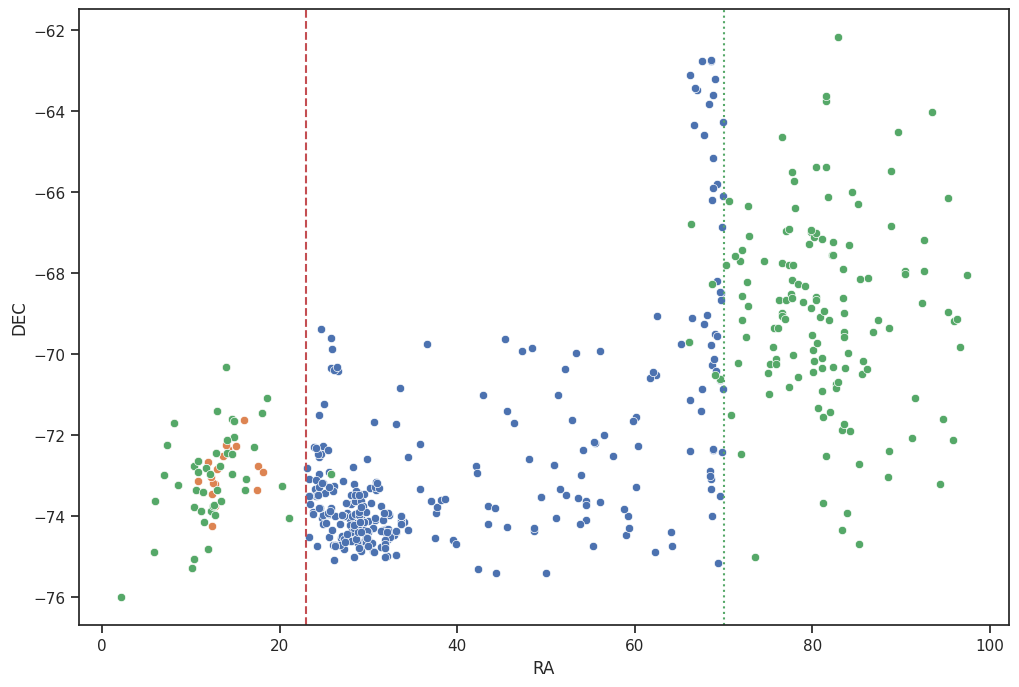

In [21]:
# Create a scatter plot with color mapping
plt.figure(figsize=(12, 8))
sns.scatterplot(x=result_table["RA_r"], y=result_table["DEC_r"])  # y_labels are the labels for each data point
sns.scatterplot(x=pn_smc["RA_r"], y=pn_smc["DEC_r"])
sns.scatterplot(x=pn_lmc["_RA"], y=pn_lmc["_DE"])
plt.axvline(x=23, color='r', linestyle='--', label='Vertical Line at x=2')
plt.axvline(x=70, color='g', linestyle=':', label='Vertical Line at x=4')
#plt.title("UMAP Visualization")
plt.xlabel("RA")
plt.ylabel("DEC")
#plt.legend()
plt.show()

In [22]:
result_table

Field,ID,RA_r,DEC_r,X_r,Y_r,s2n_r_psf,s2n_J0660_psf,s2n_i_psf,CLASS_STAR_r,CLASS_STAR_i,r_psf,J0660_psf,i_psf,e_r_psf,e_J0660_psf,e_i_psf,r - i,r - J0660,e(r - i),e(r - J0660)
str9,str24,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
b'MC0123',b'iDR4_3_MC0123_0019411',52.221207,-73.46904,5284.57,5452.06,49.227272,72.2,51.57143,1,1,18.109869,17.460869,17.282377,0.022,0.015,0.021,0.8274919999999995,0.6490000000000009,0.0304138126514911,0.026627053911388695
b'MC0138',b'iDR4_3_MC0138_0037893',29.304684,-74.70848,8180.15,5360.64,60.166668,47.086956,30.083334,1,1,18.029572,17.865572,18.238148,0.018,0.023,0.036,-0.2085759999999972,0.16400000000000148,0.04024922359499621,0.029206163733020464
b'MC0137',b'iDR4_3_MC0137_0024680',26.933619,-74.55015,3374.5,6410.22,60.166668,63.705883,38.67857,1,1,18.042515,17.833515,18.267185,0.018,0.017,0.028,-0.2246699999999997,0.20900000000000318,0.033286633954186476,0.024758836806279896
b'MC0001',b'iDR4_3_MC0001_0029699',66.26251,-63.099346,9734.62,6556.66,45.125,36.1,31.852942,1,1,18.158424,17.832424,17.991661,0.024,0.03,0.034,0.16676299999999955,0.3260000000000005,0.041617304093369625,0.03841874542459709
b'MC0001',b'iDR4_3_MC0001_0034593',68.58173,-62.763313,2836.04,8784.95,24.613636,34.935482,21.66,1,1,18.185894,17.756893,17.843475,0.044,0.031,0.05,0.3424189999999996,0.4290009999999995,0.06660330322138686,0.053823786563191554
b'MC0083',b'iDR4_3_MC0083_0036648',62.379604,-70.5175,6397.95,8441.15,57.0,54.15,41.653847,1,1,18.206917,17.842916,18.079536,0.019,0.02,0.026,0.12738099999999974,0.3640010000000018,0.032202484376209234,0.02758622844826744
b'MC0138',b'iDR4_3_MC0138_0013139',29.004818,-74.66809,8705.85,5610.06,49.227272,57.0,27.075,1,1,18.112976,18.019707,18.374174,0.022,0.019,0.04,-0.26119800000000026,0.09326899999999938,0.04565084884205331,0.029068883707497266
b'MC0099',b'iDR4_3_MC0099_0023403',35.76611,-72.213974,5079.52,5536.38,21.235294,24.613636,11.164948,1,1,18.13869,18.009691,18.677893,0.051,0.044,0.097,-0.5392030000000005,0.1289990000000003,0.10959014554237986,0.06735725647619564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [23]:
result_table.write('../STARS/Halpha-MC-STAR-intraNuvens.ecsv', format='ascii.ecsv', overwrite=True)
